In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
claims = pd.read_csv(r"C:\Users\yeshw\Downloads\food_claims_2212.csv")
claims.head()

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable


## Data Cleaning

In [4]:
for column in claims.columns:
    types = claims[column].dtype
    print(f'{column} : {types}')

claim_id : int64
time_to_close : int64
claim_amount : object
amount_paid : float64
location : object
individuals_on_claim : int64
linked_cases : object
cause : object


#### claim_id

In [5]:
# checking the type of data 
print(claims['claim_id'].dtype)
# checking for unique values 
claim_count = claims['claim_id'].value_counts()
if (claim_count > 1).any():
    print('Yes')
else:
    print('No')
null_claim = claims['claim_id'].isna().sum() 
# checking for null values 
print(f'Null values in claim_id = {null_claim}')

int64
No
Null values in claim_id = 0


In [6]:
# converting the claim_id data into nominal type 
claims['claim_id'] = claims['claim_id'].astype('category')
print(claims['claim_id'].dtype)

category


#### time_to_close

In [7]:
# checking whether it is a discrete data
print(claims['time_to_close'].dtype)

int64


In [8]:
pos_time = claims['time_to_close'].unique()
if (pos_time < 1).any():
    print('There exists a Negative value')
else:
    print('There does not exist a Negative value')

There does not exist a Negative value


In [9]:
# checking for null values 
null_close = claims['time_to_close'].isna().sum()
print(f'column "time_to_close" has {null_close} null values')

column "time_to_close" has 0 null values


#### Claim_amount

In [10]:
print(claims['claim_amount'].dtype)

object


In [11]:
# converting into float so as to make it continous and rounding it to 2 decimal places
claims['claim_amount'] = claims['claim_amount'].replace('R\$ ', '', regex = True)
claims['claim_amount'] = claims['claim_amount'].astype(float)
claims['claim_amount'] = round(claims['claim_amount'],2)
print(claims['claim_amount'].dtype)

float64


In [12]:
# checking for any null values 
null_amount = claims['claim_amount'].isna().sum()
print(f'columns claim_amount has {null_amount} null values')

columns claim_amount has 0 null values


#### amount_paid

In [13]:
# checking for whether the column is continous
print(claims["amount_paid"].dtype)

float64


In [14]:
# rounding it of two decimal places 
claims['amount_paid'] = round(claims['amount_paid'],2)

In [15]:
# checking for any missing values 
null_paid = claims['amount_paid'].isna().sum()
print(f'columns amount_paid has {null_paid} null values')

columns amount_paid has 36 null values


In [16]:
# replacing the null values with the overall median amount
claims['amount_paid'] = claims['amount_paid'].fillna(claims['amount_paid'].median())
print(claims['amount_paid'].isna().sum())

0


#### location

In [17]:
# # checking for whether the column is Nominal
print(claims['location'].dtype)

object


In [18]:
claims['location'].unique()

array(['RECIFE', 'FORTALEZA', 'SAO LUIS', 'NATAL'], dtype=object)

In [19]:
# checking for null values 
null_paid = claims['location'].isna().sum()
print(f'column location has {null_paid} null values')

column location has 0 null values


#### individuals_on_claim

In [20]:
#checking for whether the column is discrete
print(claims['individuals_on_claim'].dtype)

int64


In [21]:
# total number of individuals on this claim
print(claims['individuals_on_claim'].sum())

16099


In [22]:
individual_count = claims['individuals_on_claim'].value_counts() 
if ( individual_count < 1).any():
    print("Minimum value 'less' than 1 ")
else:
    print("Minimum value is '1'")

Minimum value is '1'


In [23]:
# checking for null values 
null_indv_claims = claims['individuals_on_claim'].isna().sum()
print(f'column "individuals_on_claim" has {null_indv_claims} null values')

column "individuals_on_claim" has 0 null values


#### linked_cases

In [24]:
#checking for whether the column is discrete
print(claims['linked_cases'].dtype)

object


In [25]:
# how many claims are linked to other cases 
linked = claims.groupby('linked_cases')['linked_cases'].count()
print(linked)

linked_cases
False    1493
True      481
Name: linked_cases, dtype: int64


In [26]:
# the column should either contain True or False values 
claims['linked_cases'].unique()

array([False, True, nan], dtype=object)

In [27]:
# checking for null values 
null_linked = claims['linked_cases'].isna().sum()
print(f'column "linked_cases" has {null_linked} null values')

column "linked_cases" has 26 null values


In [28]:
# replacing null values 
claims['linked_cases'] = claims['linked_cases'].fillna('False')
claims['linked_cases'] = claims['linked_cases'].astype(str)
claims['linked_cases'].unique()

array(['False', 'True'], dtype=object)

In [29]:
# how many claims are linked to other cases 
linked = claims.groupby('linked_cases')['linked_cases'].count()
print(linked)

linked_cases
False    1519
True      481
Name: linked_cases, dtype: int64


#### cause

In [30]:
#checking for whether the column is nominal
print(claims['cause'].dtype)

object


In [31]:
# checking for the unique values
claims['cause'].unique()
# here we can see that different categories are created based on word format
claims['cause'] = claims['cause'].str.lower()
claims['cause'] = claims['cause'].replace(['vegetable','vegetables'], 'vegetable')
claims['cause'] = claims['cause'].replace(['meat',' meat'], 'meat')
print(claims.groupby('cause')['cause'].count())

cause
meat         957
unknown      713
vegetable    330
Name: cause, dtype: int64


In [32]:
# checking for null values 
null_cause = claims['cause'].isna().sum()
print(f'column "cause" has {null_cause} null values')

column "cause" has 0 null values


Cleaned Data

In [83]:
claims.head()

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,24447.20,23986.30,SAO LUIS,10,True,meat
3,4,186,29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,19520.60,16251.06,RECIFE,11,False,vegetable


## 2) Create a visualization that shows the number of claims in each location. Use the visualization to:

### a) State which category of the variable location has the most observations

In [33]:
observations = claims.groupby('location')['location'].count().reset_index(name='count')
observations = observations.sort_values(by = 'count',ascending = False)
observations = observations.reset_index(drop = True)
print(observations)

    location  count
0     RECIFE    885
1   SAO LUIS    517
2  FORTALEZA    311
3      NATAL    287


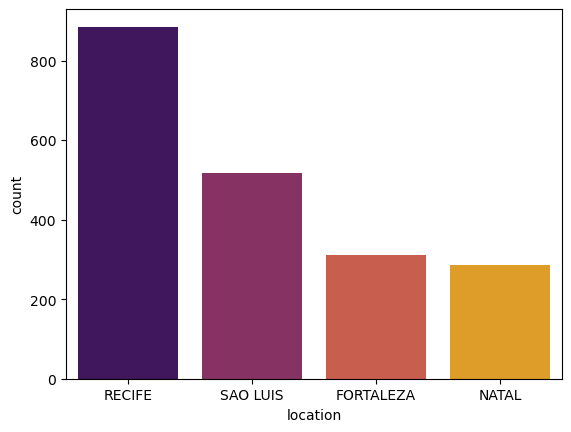

In [34]:
sns.barplot( x = observations['location'], y = observations['count'], palette = 'inferno' )
plt.show()

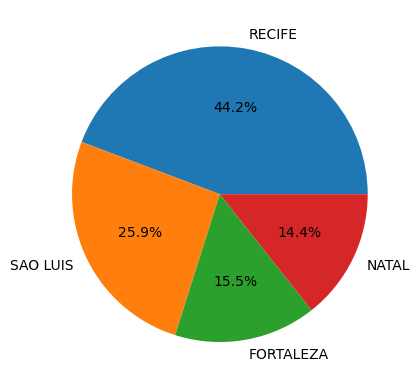

In [35]:
plt.pie(observations['count'], labels = observations['location'], autopct='%1.1f%%')
plt.show()

### 3. Describe the distribution of time to close for all claims. Your answer must include a visualization that shows the distribution.


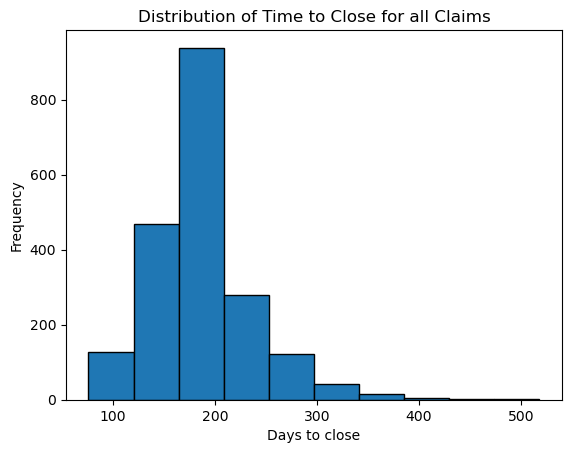

In [55]:
plt.hist(claims['time_to_close'], bins = 10,edgecolor = 'black')
plt.xlabel('Days to close')
plt.ylabel('Frequency')
plt.title('Distribution of Time to Close for all Claims')
plt.show()

### 4. Describe the relationship between time to close and location. Your answer must include a visualization to demonstrate the relationship.


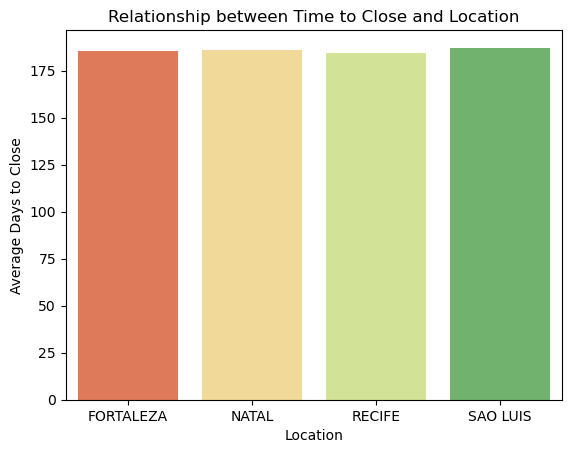

In [75]:
time_location = claims.groupby('location')['time_to_close'].mean().reset_index(name = 'count')
sns.barplot(x = time_location['location'], y = time_location['count'], palette = 'RdYlGn')
plt.xlabel('Location')
plt.ylabel('Average Days to Close')
plt.title('Relationship between Time to Close and Location')
plt.show()

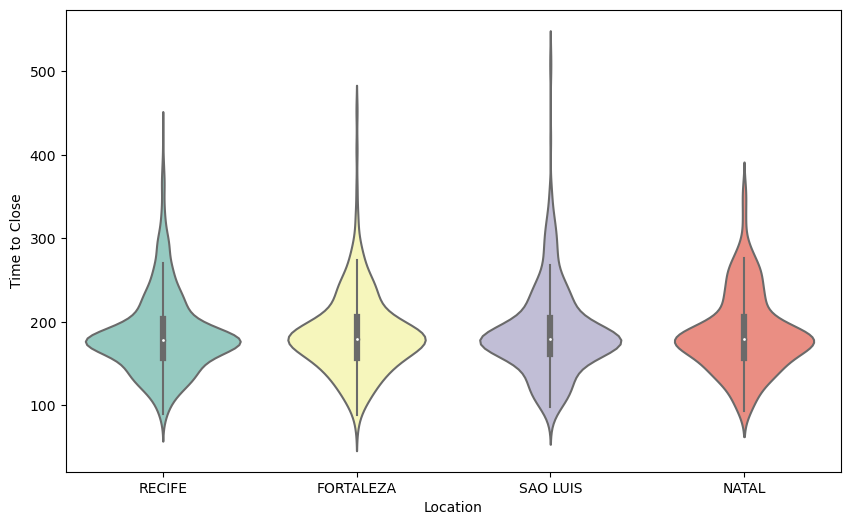

In [81]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=claims, x='location', y='time_to_close', palette='Set3')
plt.xlabel('Location')
plt.ylabel('Time to Close')
plt.show()